# Competitor analysis

# Introduction

As Company **`A`**, a burgeoning brand in the market, we aim to leverage the dataset belonging to our established competitor, Company **`B`**. Our strategic approach involves segmenting customers within the dataset and thoroughly analyzing the behavior of each segment. Subsequently, we will tailor specific strategies for each segment to effectively position ourselves in the market.

In this notebook, our objective is to conduct user segmentation based on categorical properties such as smoking status, gender, and health condition. We'll then group users into five-year age intervals.

Subsequently, we'll compute the average revenue for each segment, along with the revenue per customer KPI. We'll also analyze the preferred mode of payment to determine the most suitable insurance plan for each segment. Additionally, we'll identify the minimum, maximum, and median payments of users within each segment, as well as the number of users in each segment. By calculating the revenue generated from each segment, we'll pinpoint the most valuable and populous customer segments.



In [5]:
import numpy as np 
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [6]:
path = "../insurance.csv"
data = pd.read_csv(path)
data["age"] = data["age"].astype("Int64")


In [7]:
data.drop_duplicates(inplace=True)
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


--------------------

# Data preparation

We need to prepare our data for segmentation. Let's examine the dataset in its initial state.

In [8]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Age interval:

In [9]:
bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83]  # Define your age intervals here
labels = ['18-23', '24-28', '29-33', '34-38', '39-43', '44-48', "49-53", "54-58", "59-63", "64-68", "69-73", "74-78", "79-83"]  # Labels for the intervals

# Create a new column with age intervals
data['age_range'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data.head(4)

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,18-23
1,18,male,33.770,1,no,southeast,1725.55230,18-23
2,28,male,33.000,3,no,southeast,4449.46200,29-33
3,33,male,22.705,0,no,northwest,21984.47061,34-38


## Health condition Based on BMI score

In [10]:
def bmi_condition(row):

    if row['bmi'] < 18.5:
        return "under_weight"
    elif row['bmi'] > 24.9:
        return "over_weight"
    else:
        return "healthy"

In [11]:
data["bmi_condition"] = data.apply(bmi_condition, axis=1)

This is our finalized dataset, which is the foundation of our segmentation process. Within this dataset, we have defined:

1. Age intervals
2. BMI conditions

 Due to the nature of the insurance business and after observing no significant differences in revenue among different regions (as indicated in the EDA report), I have decided to drop region column.

In the next step, I will segment the data based on categorical variables in the dataframe and create separate dataframes for each condition.

In [12]:
data.drop(columns="region", inplace=True)
data.head(3)

,age,sex,bmi,children,smoker,charges,age_range,bmi_condition
0,19,female,27.90,0,yes,16884.9240,18-23,over_weight
1,18,male,33.77,1,no,1725.5523,18-23,over_weight
2,28,male,33.00,3,no,4449.4620,29-33,over_weight


# Segmentation

In our dataset, we have the following variables:

- Gender (male/female)
- Number of children (0, 1, 3, 2, 4, 5)
- Smoking status (smoker/non-smoker)
- Age range (in 5-year intervals)
- Health condition: Underweight, Healthy, Overweight (based on BMI score of each user)

We will create several dataframes, each containing a combination of these conditions. For example: **`male-smoker-underweight-two_children`**.


In [13]:
gender = ["male", "female"]
smoke = ["yes", "no"]
children = list(data.children.unique())
health_condition = list(data.bmi_condition.unique())

In [14]:
data.head(3)

,age,sex,bmi,children,smoker,charges,age_range,bmi_condition
0,19,female,27.90,0,yes,16884.9240,18-23,over_weight
1,18,male,33.77,1,no,1725.5523,18-23,over_weight
2,28,male,33.00,3,no,4449.4620,29-33,over_weight


,index,sex,smoker,bmi_condition,children,charges_count,charges_avg,revenue,rev_per_costumer
4,43,male,yes,over_weight,0,51,34356.377681,1.752175e+06,8.936094e+07
38,5,female,no,over_weight,0,195,7728.144666,1.506988e+06,2.938627e+08
36,30,male,no,over_weight,0,180,7892.383349,1.420629e+06,2.557132e+08
5,18,female,yes,over_weight,0,41,34139.822789,1.399733e+06,5.738904e+07
6,44,male,yes,over_weight,1,34,33681.703812,1.145178e+06,3.893605e+07
0,45,male,yes,over_weight,2,27,38872.013417,1.049544e+06,2.833770e+07
29,6,female,no,over_weight,1,109,8761.713400,9.550268e+05,1.040979e+08
34,31,male,no,over_weight,1,110,7924.412547,8.716854e+05,9.588539e+07
23,7,female,no,over_weight,2,79,10341.478413,8.169768e+05,6.454117e+07
2,46,male,yes,over_weight,3,21,36503.573336,7.665750e+05,1.609808e+07


Next, we've segmented our data. In the upcoming step, I'll be computing the revenue gained from each group.

,index,sex,smoker,bmi_condition,children,charges_count,charges_avg,revenue,rev_per_costumer
4,43,male,yes,over_weight,0,51,34356.377681,1.752175e+06,8.936094e+07
38,5,female,no,over_weight,0,195,7728.144666,1.506988e+06,2.938627e+08
36,30,male,no,over_weight,0,180,7892.383349,1.420629e+06,2.557132e+08
5,18,female,yes,over_weight,0,41,34139.822789,1.399733e+06,5.738904e+07
6,44,male,yes,over_weight,1,34,33681.703812,1.145178e+06,3.893605e+07
0,45,male,yes,over_weight,2,27,38872.013417,1.049544e+06,2.833770e+07
29,6,female,no,over_weight,1,109,8761.713400,9.550268e+05,1.040979e+08
34,31,male,no,over_weight,1,110,7924.412547,8.716854e+05,9.588539e+07
23,7,female,no,over_weight,2,79,10341.478413,8.169768e+05,6.454117e+07
2,46,male,yes,over_weight,3,21,36503.573336,7.665750e+05,1.609808e+07


Fascinatingly, a significant portion of our revenue stems from overweight male smokers with no children. Although their numbers aren't extensive (51 individuals), they allocate substantial funds toward their health insurance.

# selection 

During our exploratory data analysis (EDA), we observed that the majority of our customers are overweight. Therefore, to boost revenue and expand our customer base, it's advantageous to concentrate our efforts on this demographic.

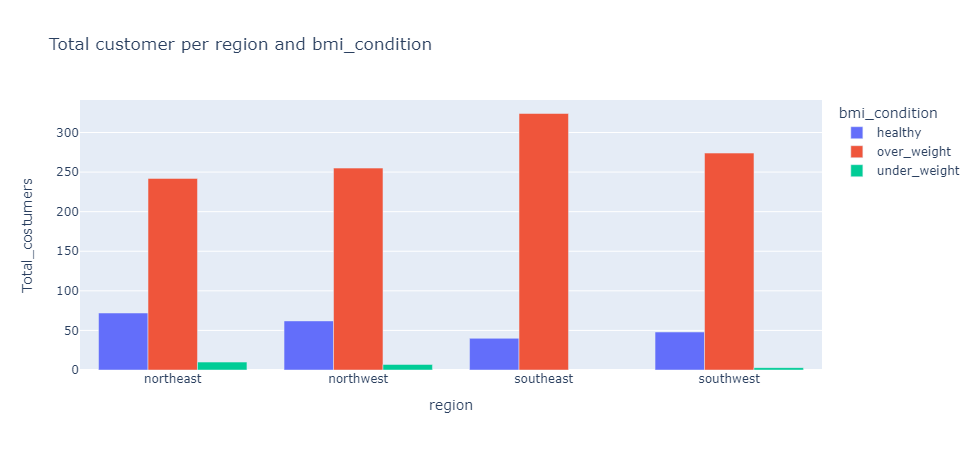